In [1]:
lambda_ = 4
mu = 5

In [2]:
def Pa(lambda_,mu):
    return lambda_/(mu+lambda_)

V1 = Pa(lambda_,mu)

In [3]:
def Rate(lambda_,mu):
    return lambda_+mu

V2 = Rate(lambda_,mu)

In [4]:

from cmath import log
from random import random, seed


def generate_MM1(lambda_=4, mu=5, N0=5, Tmax=200):
    """
    function generate_MM1(N0 = 5,Tmax=200)
    generates an MM1 file
    INPUTS
    ------
    lambda, mu: arrival and departure rates
    N0:         initial state of the system (default = 5)
    Tmax:       duration of the observation (default = 200)
    OUTPUTS
    -------
    T:          list of time of events (arrivals or departures) over [0,T]
    N:          list of system states (at T(t): N->N+1 or N->N-1)
    """
    seed(20)
    tau = 0       # initial instant
    T = [0]     # list of instants of events
    N = [N0]    # initial state of the system, list of state evolutions

    while T[-1] < Tmax:
        if N[-1] == 0:
            tau = -1./lambda_*log(random())  # inter-event time when N(t)=0
            event = 1   # arrival
        else:
            # inter-event time when N(t)>0
            tau = -1./Rate(lambda_, mu)*log(random())
            event = 2*(random() < Pa(lambda_, mu))-1
            # +1 for an arrival (with probability Pa), -1 for a departure
        N = N + [N[-1]+event]
        T = T + [T[-1]+tau]

    T = T[:-1]  # event after Tmax is discarded
    N = N[:-1]
    return T, N

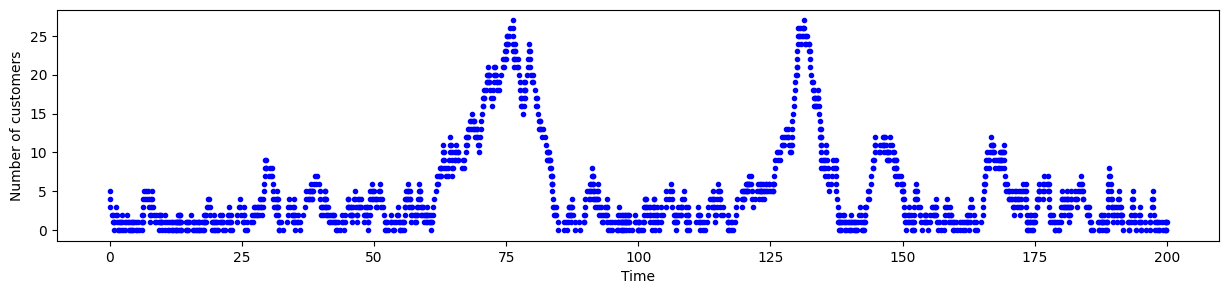

In [8]:
from pylab import *


T,N = generate_MM1()
rcParams['figure.figsize'] = [15,3]
plot(T,N,'.b')
xlabel('Time')
ylabel('Number of customers')
show()